# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#API CALL URL = http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={YOUR API KEY}
base_url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
weather_api_key = "1c8babe22822ec7715d3f85b5b6dcd85"
url = base_url + weather_api_key
url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1c8babe22822ec7715d3f85b5b6dcd85'

In [4]:
# Make call
response = requests.get(url)
weather_json = response.json()
weather_json

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1592946000,
   'main': {'temp': 292.08,
    'feels_like': 292.69,
    'temp_min': 291.26,
    'temp_max': 292.08,
    'pressure': 1018,
    'sea_level': 1018,
    'grnd_level': 1002,
    'humidity': 70,
    'temp_kf': 0.82},
   'weather': [{'id': 801,
     'main': 'Clouds',
     'description': 'few clouds',
     'icon': '02n'}],
   'clouds': {'all': 19},
   'wind': {'speed': 0.61, 'deg': 32},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-06-23 21:00:00'},
  {'dt': 1592956800,
   'main': {'temp': 290.55,
    'feels_like': 289.34,
    'temp_min': 289.91,
    'temp_max': 290.55,
    'pressure': 1019,
    'sea_level': 1019,
    'grnd_level': 1003,
    'humidity': 67,
    'temp_kf': 0.64},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 8},
   'wind': {'speed': 2.28, 'deg': 347},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-06-24 00:00:00'},
  {'dt': 1592967600,

In [5]:
# print(json.dumps(weather_json, indent=4, sort_keys=True))
# print location
json.dumps(weather_json, indent=4, sort_keys=True)
print(weather_json["city"]['name'])

Moscow


In [6]:
# Per isntructions - For final notebook, perform a weather check on each of... 
# ...the cities using a series of successive API calls
# Create empty lists to hold response information
city_id = []
city_name = []
cloudiness = []
country = []
lat = []
lng = []
date = []
max_temp = []
humidity = []
wind_speed = []
count = 0

# Loop through city list and request data from each city for the variables above, print N/A for those not found
for city in cities:
    response = requests.get(url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_id.append(weather_json['city']['id'])
        city_name.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        date.append(weather_json['list'][0]['dt'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"City {count} | {city}")
    except:
        print("Record n/a") 
        pass
        
print("Complete!")

City 1 | akdepe
City 2 | natal
City 3 | puerto ayora
City 4 | georgiyevka
City 5 | chokurdakh
City 6 | new norfolk
City 7 | mataura
City 8 | hithadhoo
City 9 | pontes e lacerda
City 10 | vaini
City 11 | saint-philippe
City 12 | markova
City 13 | warrington
Record n/a
City 14 | chuy
City 15 | esperance
City 16 | tilichiki
City 17 | roald
City 18 | nikolskoye
City 19 | castlemaine
City 20 | hermanus
City 21 | ushuaia
City 22 | vieques
City 23 | saskylakh
City 24 | cape town
City 25 | dickinson
City 26 | kushima
City 27 | thompson
City 28 | nhulunbuy
City 29 | sao filipe
City 30 | khatanga
City 31 | tautira
Record n/a
City 32 | pisco
City 33 | arraial do cabo
City 34 | tromso
City 35 | east london
City 36 | airai
City 37 | bubaque
Record n/a
City 38 | goba
City 39 | rikitea
City 40 | inhambane
City 41 | atuona
City 42 | tasiilaq
City 43 | manicore
City 44 | salamanca
City 45 | takhtamygda
City 46 | togur
City 47 | gizo
City 48 | busselton
Record n/a
City 49 | rawson
City 50 | klaksvik
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Display the data
# Create weather dictionary from attributes in loop. Use this dictionary to create a pandas data frame.
weather_dictionary = {
                     "City ID": city_id,
                     "City": city_name,
                     "Country": country,
                     "Latitude": lat,
                     "Longitude": lng,
                     "Date": date,
                     "Max. Temperature (F)": max_temp,
                     "Cloudiness (%)": cloudiness,
                     "Humidity (%)": humidity,
                     "Wind Speed (mph)": wind_speed}

# Data Frame
weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()  

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,601551,Akdepe,TM,42.0551,59.3788,1592946000,79.43,0,33,12.71
1,3394023,Natal,BR,-5.7950,-35.2094,1592946000,80.56,32,65,11.99
2,3652764,Puerto Ayora,EC,-0.7393,-90.3518,1592946000,72.57,57,75,8.30
3,1524243,Georgiyevka,KZ,43.0369,74.7114,1592946000,68.45,11,42,4.94
4,2126123,Chokurdakh,RU,70.6333,147.9167,1592946000,70.70,15,33,5.75


In [8]:
# Per isntructions - For final notebook, save a csv of all retrieved data
weather_df.to_csv(r'output_data\weater_data.csv')
total_cities = len(weather_df)
total_cities

551

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.sort_values("Humidity (%)", ascending=False)

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
330,1053507,Vondrozo,MG,-22.8167,47.2833,1592946000,58.42,97,100,3.22
35,1651810,Airai,TL,-8.9266,125.4092,1592946000,56.46,41,100,3.80
496,2013279,Vostok,RU,46.4856,135.8833,1592946000,52.92,100,100,3.80
61,1308937,Mogok,MM,22.9167,96.5000,1592946000,67.17,100,100,3.40
512,554153,Kalino,RU,58.2504,57.6085,1592946000,51.67,100,97,4.47
...,...,...,...,...,...,...,...,...,...,...
338,5546220,Saint George,US,37.1041,-113.5841,1592946000,104.32,1,10,11.72
545,2447513,Arlit,NE,18.7369,7.3853,1592946000,99.88,3,8,4.85
135,2449893,Tessalit,ML,20.1986,1.0114,1592946000,100.11,0,8,8.86
456,2450173,Taoudenni,ML,22.6783,-3.9836,1592946000,105.53,12,7,12.15


In [10]:
# AFTER SORTING BY DESCENDING HUMIDITY, THERE ARE NO VALUES THAT SHOW HUMIDITY OVER 100%

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

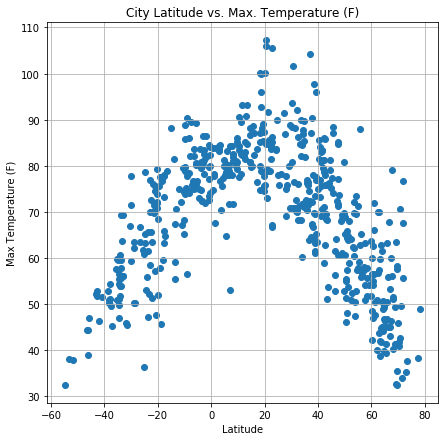

In [13]:
# Create scatter plot to showcase Temperature (F) vs. Latitude
plot_lat = weather_df['Latitude']
plot_temp = weather_df['Max. Temperature (F)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_temp)
plt.title('City Latitude vs. Max. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('temp_vs_lat_scatter')
plt.show()

## Latitude vs. Humidity Plot

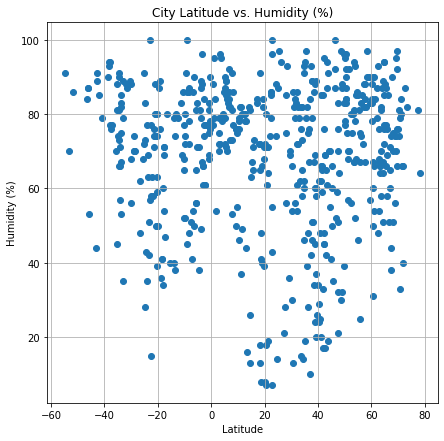

In [14]:
# Create scatter plot to showcase Humidity (%) vs. Latitude
plot_lat = weather_df['Latitude']
plot_hum = weather_df['Humidity (%)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_hum)
plt.title('City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('hum_vs_lat_scatter')
plt.show()

## Latitude vs. Cloudiness Plot

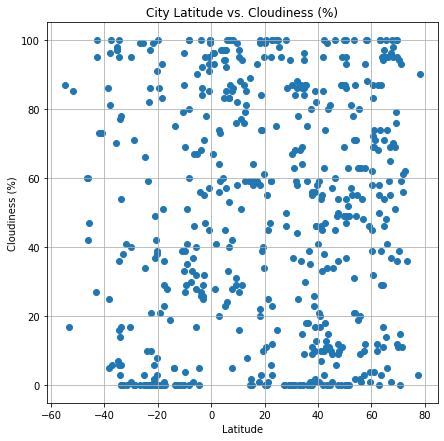

In [15]:
# Create scatter plot to showcase Cloudiness (%) vs. Latitude
plot_lat = weather_df['Latitude']
plot_cloud = weather_df['Cloudiness (%)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_cloud)
plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('cloud_vs_lat_scatter')
plt.show()

## Latitude vs. Wind Speed Plot

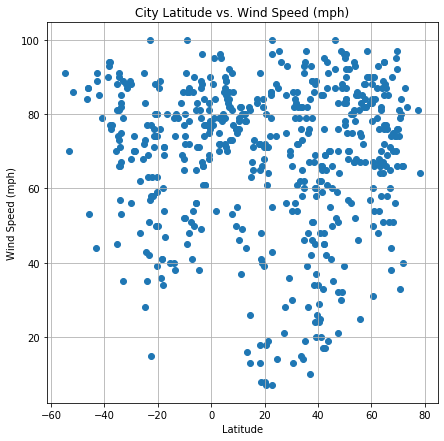

In [16]:
# Create scatter plot to showcase Wind Speed (mph) vs. Latitude
plot_lat = weather_df['Latitude']
plot_wind = weather_df['Wind Speed (mph)']

plt.figure(figsize=(7,7))
plt.scatter(plot_lat, plot_hum)
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('wind_vs_lat_scatter')
plt.show()

In [17]:
# Can't determine why wind scatter is showing much higher values than are shown in the dataframe...
weather_df.sort_values("Wind Speed (mph)", ascending=False)

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
305,64814,Bandarbeyla,SO,9.4942,50.8122,1592946000,80.89,29,76,28.07
522,57000,Hobyo,SO,5.3505,48.5268,1592946000,78.66,23,79,27.07
234,2377457,Nouadhibou,MR,20.9310,-17.0347,1592946000,73.09,0,71,25.72
222,3670218,San Andrés,CO,12.5847,-81.7006,1592946000,85.17,79,78,25.66
204,60019,Eyl,SO,7.9803,49.8164,1592946000,80.96,5,73,22.88
...,...,...,...,...,...,...,...,...,...,...
196,2316259,Bulungu,CD,-4.5500,18.6000,1592946000,74.89,5,38,0.65
42,3663503,Manicoré,BR,-5.8092,-61.3003,1592946000,89.20,40,56,0.58
353,462626,Zilair,RU,52.2332,57.4392,1592946000,50.92,57,80,0.20
152,2022129,Kichera,RU,55.9375,110.0997,1592946000,55.81,9,67,0.18


## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
# Run linear regression on each relationship, separating them into... 
# ...Northern Hemisphere (greater than or equal to 0 degrees latitude) and...
# ...Southern Hemisphere (less than 0 degrees latitude)

In [20]:
# Create Northern Hemisphere DF
north_df = weather_df.loc[weather_df['Latitude'] >= 0,:]
north_df.head()

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,601551,Akdepe,TM,42.0551,59.3788,1592946000,79.43,0,33,12.71
3,1524243,Georgiyevka,KZ,43.0369,74.7114,1592946000,68.45,11,42,4.94
4,2126123,Chokurdakh,RU,70.6333,147.9167,1592946000,70.70,15,33,5.75
11,701802,Markova,UA,48.6758,24.4138,1592946000,60.71,87,97,5.59
12,2634739,Warrington,GB,53.3925,-2.5802,1592946000,72.10,21,67,6.67


In [21]:
# Create Southern Hemisphere DF
south_df = weather_df.loc[weather_df['Latitude'] < 0,:]
south_df.head()

,City ID,City,Country,Latitude,Longitude,Date,Max. Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
1,3394023,Natal,BR,-5.7950,-35.2094,1592946000,80.56,32,65,11.99
2,3652764,Puerto Ayora,EC,-0.7393,-90.3518,1592946000,72.57,57,75,8.30
5,2155415,New Norfolk,AU,-42.7826,147.0587,1592946000,51.71,100,89,3.02
6,6201424,Mataura,NZ,-46.1927,168.8643,1592946000,38.93,42,87,2.10
7,1282256,Hithadhoo,MV,-0.6000,73.0833,1592946000,84.06,100,76,11.61


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5466174266202268


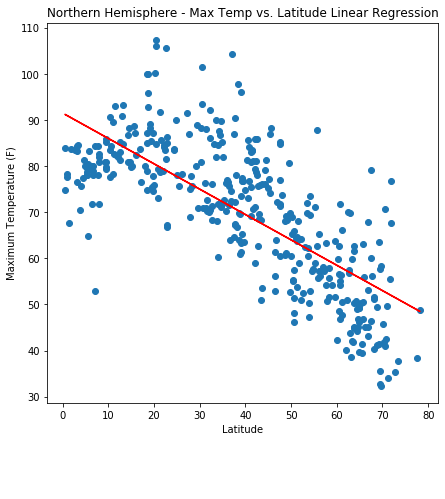

In [22]:
## Convert to floats and store lat and temp as x and y values
nlat_mean = round(north_df['Latitude'].astype('float').mean(), 2)
nlat_median = round(north_df['Latitude'].astype('float').median(), 2)
nlat_mode = round(north_df['Latitude'].astype('float').mode(), 2)

ntemp_mean = round(north_df['Max. Temperature (F)'].astype('float').mean(), 2)
ntemp_median = round(north_df['Max. Temperature (F)'].astype('float').median(), 2)
ntemp_mode = round(north_df['Max. Temperature (F)'].astype('float').mode(), 2)

x1_values = north_df['Latitude'].astype('float')
y1_values = north_df['Max. Temperature (F)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x1_values,y1_values)

# Plot regression line
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [23]:
print("This plot shows a moderate positive relationship.")

This plot shows a moderate positive relationship.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6618635359570835


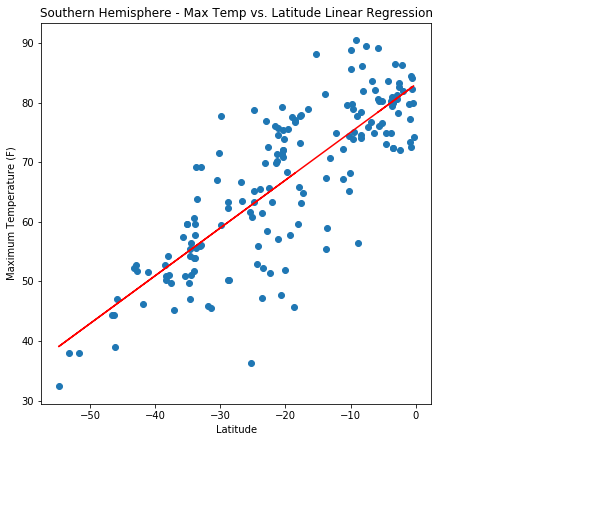

In [24]:
## Convert to floats and store lat and temp as x and y values
slat_mean = round(south_df['Latitude'].astype('float').mean(), 2)
slat_median = round(south_df['Latitude'].astype('float').median(), 2)
slat_mode = round(south_df['Latitude'].astype('float').mode(), 2)

stemp_mean = round(south_df['Max. Temperature (F)'].astype('float').mean(), 2)
stemp_median = round(south_df['Max. Temperature (F)'].astype('float').median(), 2)
stemp_mode = round(south_df['Max. Temperature (F)'].astype('float').mode(), 2)

x2_values = south_df['Latitude'].astype('float')
y2_values = south_df['Max. Temperature (F)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x2_values,y2_values)

# Plot regression line
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [25]:
print("This plot shows a moderate positive relationship.")

This plot shows a moderate positive relationship.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0019784276147203667


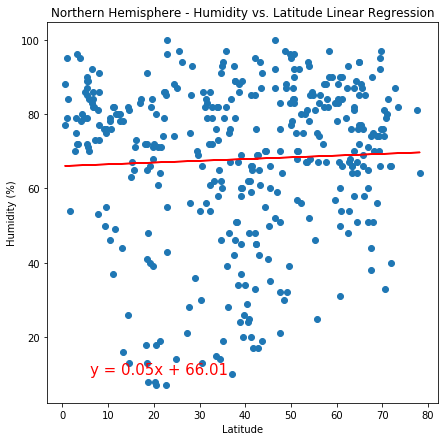

In [26]:
## Convert to floats and store lat and hum as x and y values
nlat_mean = round(north_df['Latitude'].astype('float').mean(), 2)
nlat_median = round(north_df['Latitude'].astype('float').median(), 2)
nlat_mode = round(north_df['Latitude'].astype('float').mode(), 2)

nhum_mean = round(north_df['Humidity (%)'].astype('float').mean(), 2)
nhum_median = round(north_df['Humidity (%)'].astype('float').median(), 2)
nhum_mode = round(north_df['Humidity (%)'].astype('float').mode(), 2)

x1_values = north_df['Latitude'].astype('float')
y3_values = north_df['Humidity (%)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y3_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x1_values,y3_values)

# Plot regression line
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [27]:
print("This plot shows no linear relationship.")

This plot shows no linear relationship.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.012558190388864144


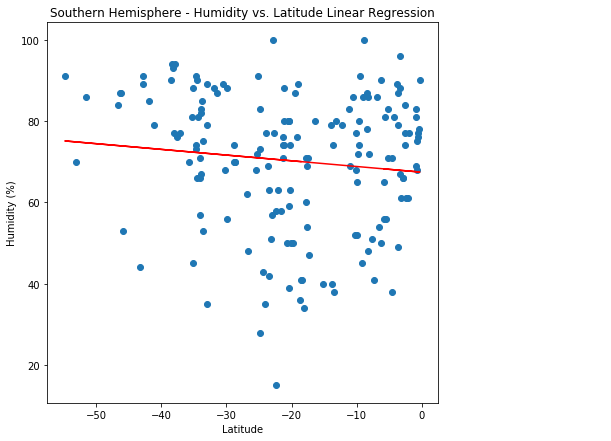

In [28]:
## Convert to floats and store lat and hum as x and y values
slat_mean = round(south_df['Latitude'].astype('float').mean(), 2)
slat_median = round(south_df['Latitude'].astype('float').median(), 2)
slat_mode = round(south_df['Latitude'].astype('float').mode(), 2)

shum_mean = round(south_df['Humidity (%)'].astype('float').mean(), 2)
shum_median = round(south_df['Humidity (%)'].astype('float').median(), 2)
shum_mode = round(south_df['Humidity (%)'].astype('float').mode(), 2)

x2_values = south_df['Latitude'].astype('float')
y4_values = south_df['Humidity (%)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y4_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x2_values,y4_values)

# Plot regression line
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [29]:
print("This plot shows no linear relationship.")

This plot shows no linear relationship.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.005097335387441428


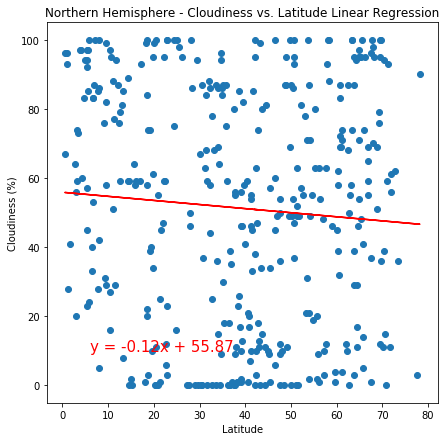

In [30]:
## Convert to floats and store lat and clo as x and y values
nlat_mean = round(north_df['Latitude'].astype('float').mean(), 2)
nlat_median = round(north_df['Latitude'].astype('float').median(), 2)
nlat_mode = round(north_df['Latitude'].astype('float').mode(), 2)

nclo_mean = round(north_df['Cloudiness (%)'].astype('float').mean(), 2)
nclo_median = round(north_df['Cloudiness (%)'].astype('float').median(), 2)
nclo_mode = round(north_df['Cloudiness (%)'].astype('float').mode(), 2)

x1_values = north_df['Latitude'].astype('float')
y5_values = north_df['Cloudiness (%)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y5_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x1_values,y5_values)

# Plot regression line
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [31]:
print("This plot shows no linear relationship.")

This plot shows no linear relationship.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0030688086113880462


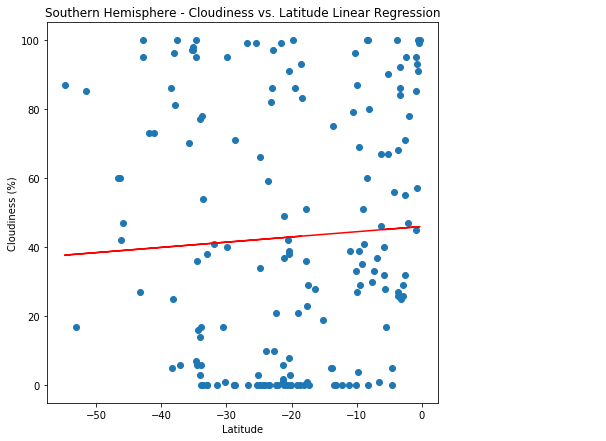

In [32]:
## Convert to floats and store lat and clo as x and y values
slat_mean = round(south_df['Latitude'].astype('float').mean(), 2)
slat_median = round(south_df['Latitude'].astype('float').median(), 2)
slat_mode = round(south_df['Latitude'].astype('float').mode(), 2)

sclo_mean = round(south_df['Cloudiness (%)'].astype('float').mean(), 2)
sclo_median = round(south_df['Cloudiness (%)'].astype('float').median(), 2)
sclo_mode = round(south_df['Cloudiness (%)'].astype('float').mode(), 2)

x2_values = south_df['Latitude'].astype('float')
y6_values = south_df['Cloudiness (%)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y6_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x2_values,y6_values)

# Plot regression line
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [33]:
print("This plot shows no linear relationship.")

This plot shows no linear relationship.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.015534050685255948


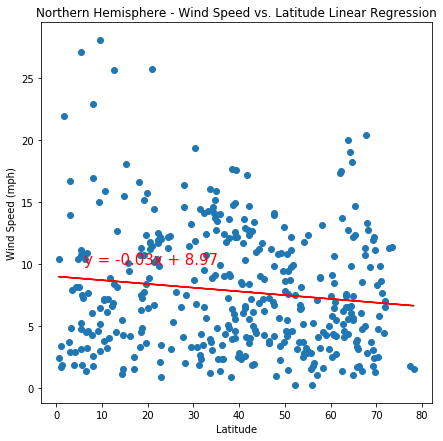

In [34]:
## Convert to floats and store lat and clo as x and y values
nlat_mean = round(north_df['Latitude'].astype('float').mean(), 2)
nlat_median = round(north_df['Latitude'].astype('float').median(), 2)
nlat_mode = round(north_df['Latitude'].astype('float').mode(), 2)

nwin_mean = round(north_df['Wind Speed (mph)'].astype('float').mean(), 2)
nwin_median = round(north_df['Wind Speed (mph)'].astype('float').median(), 2)
nwin_mode = round(north_df['Wind Speed (mph)'].astype('float').mode(), 2)

x1_values = north_df['Latitude'].astype('float')
y7_values = north_df['Wind Speed (mph)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y7_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x1_values,y7_values)

# Plot regression line
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [35]:
print("This plot shows no linear relationship.")

This plot shows no linear relationship.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0024926765437556777


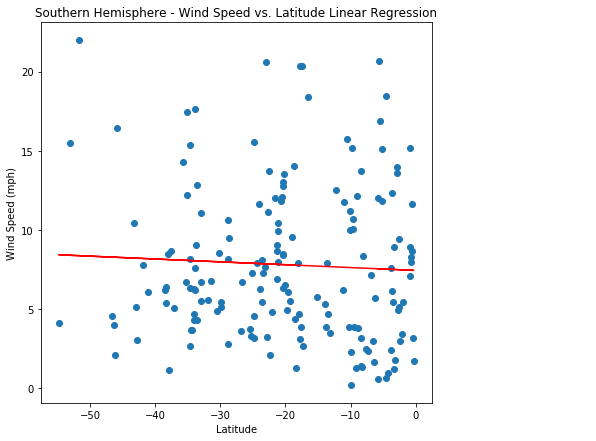

In [36]:
## Convert to floats and store lat and clo as x and y values
slat_mean = round(south_df['Latitude'].astype('float').mean(), 2)
slat_median = round(south_df['Latitude'].astype('float').median(), 2)
slat_mode = round(south_df['Latitude'].astype('float').mode(), 2)

swin_mean = round(south_df['Wind Speed (mph)'].astype('float').mean(), 2)
swin_median = round(south_df['Wind Speed (mph)'].astype('float').median(), 2)
swin_mode = round(south_df['Wind Speed (mph)'].astype('float').mode(), 2)

x2_values = south_df['Latitude'].astype('float')
y8_values = south_df['Wind Speed (mph)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y8_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x2_values,y8_values)

# Plot regression line
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [37]:
print("This plot shows no linear relationship.")

This plot shows no linear relationship.
